# Geospatial Data in Python: Database, Desktop, and the Web
## Tutorial (Part 3)

## Convert vector data formats (Shapefile -> GeoJSON)

In [1]:
%%bash
echo "hi"
python --version


hi


Python 3.5.4 :: Anaconda custom (64-bit)


## Read geospatial raster data

Note: test tif file with rasterio

In [2]:
from PIL import Image, ImageFilter

#Read image
#im = Image.open( '../data/l8rgb-3.png' )
#Display image
#im.show()


#Read image
#im = Image.open( '../data/LC08_SRB2.tif' )
#Display image
#im.show()


In [6]:
import rasterio
from fiona.crs import to_string
import os
import numpy as np


image_file = os.path.join('..', 'data', 'LC08_SRB2.tif')


# Register format drivers with a context manager
with rasterio.drivers():
    with rasterio.open(image_file, 'r') as source:
        print(source.count, source.shape)
        print(source.driver)
        
        print(to_string(source.crs))
        
        # Get data from each band (newer versions of rasterio use source.read())
        #r, g, b = map(source.read_band, (1, 2, 3))
        #r, g, b = source.read()
        #data = np.dstack((r, g, b))  # Each band is just an ndarray!
        
        r = source.read_band(1)
        data = r
        #data = np.dstack((r, r, r))  # Each band is just an ndarray!
        
        print(type(data))
        
        # Get the bounds of the raster (for plotting later)
        bounds = source.bounds[::2] + source.bounds[1::2]
        print(type(bounds))
        print(bounds)
        #bounds = (0.0, 5000.0, 5000.0, 0.0)
        print(type(bounds))
        print(bounds)

1 (5000, 5000)
GTiff
+datum=WGS84 +lat_0=23 +lat_1=29.5 +lat_2=45.5 +lon_0=-96 +no_defs +proj=aea +units=m +x_0=0 +y_0=0


/home/tony/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: read_band() is deprecated and will be removed by Rasterio 1.0. Please use read() instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'numpy.ndarray'>
<class 'tuple'>
(-2115585.0, -1965585.0, 2714805.0, 2864805.0)
<class 'tuple'>
(-2115585.0, -1965585.0, 2714805.0, 2864805.0)


## Simple plot of geospatial raster

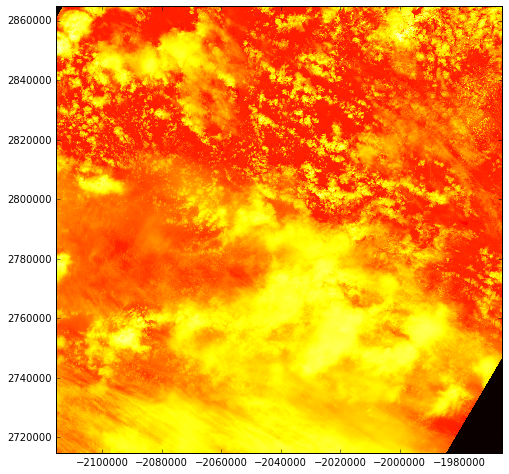

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(8, 8))
ax = plt.imshow(data, extent=bounds, cmap='hot')

#ax = plt.imshow(data)

plt.show()

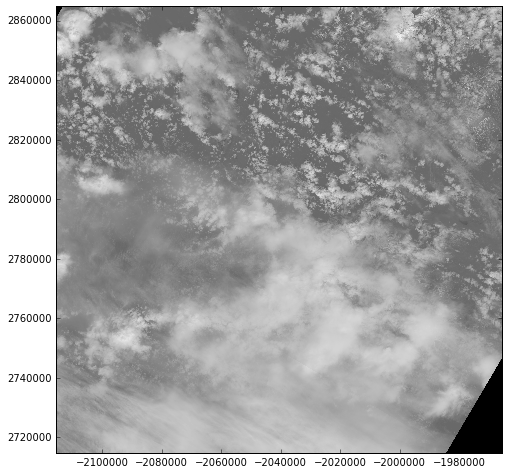

In [10]:
ig = plt.figure(figsize=(8, 8))
ax = plt.imshow(data, extent=bounds, cmap='gray')

#ax = plt.imshow(data)

plt.show()

### Now with smaller scale png 



/home/tony/anaconda3/lib/python3.5/site-packages/rasterio/__init__.py:193: UserWarning: Dataset has no geotransform set.  Default transform will be applied (Affine.identity())
  s.start()


3 (1250, 1250)
PNG

<class 'numpy.ndarray'>
<class 'tuple'>
(0.0, 1250.0, 1250.0, 0.0)


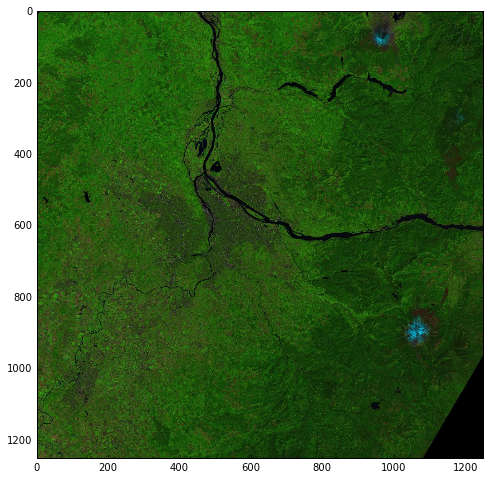

In [5]:
image_file = os.path.join('..', 'data', 'l8rgb-2.png')


# Register format drivers with a context manager
with rasterio.drivers():
    with rasterio.open(image_file, 'r') as source:
        print(source.count, source.shape)
        print(source.driver)
        print(to_string(source.crs))
        
        # Get data from each band (newer versions of rasterio use source.read())
        #r, g, b = map(source.read_band, (1, 2, 3))
        r, g, b = source.read()
        data = np.dstack((r, g, b))  # Each band is just an ndarray!
        print(type(data))
        
        # Get the bounds of the raster (for plotting later)
        bounds = source.bounds[::2] + source.bounds[1::2]
        print (type(bounds))
        print(bounds)
        
fig = plt.figure(figsize=(8, 8))
ax = plt.imshow(data, extent=bounds)
plt.show()